    principal component 1  principal component 2  score
0              -66.904591               2.775958      3
1               25.478311              -4.893777      3
2              -22.899197               0.534971      3
3              -22.234624              -0.707950      3
4              -22.733015              -0.634788      3
5              -26.508904              -0.196061      3
6               11.198454              -3.798546      3
7               12.917279               1.221962      3
8              -28.262739               2.584138      3
9              -36.405669               2.812352      3
10             -25.777109              -0.107913      3
11             -60.522468               8.918126      3
12             -32.326509               1.585878      2
13              66.604896             -53.597916      2
14             -22.454358              -1.879043      2
15             -26.139021              -0.564604      2
16             -50.814449               6.918950

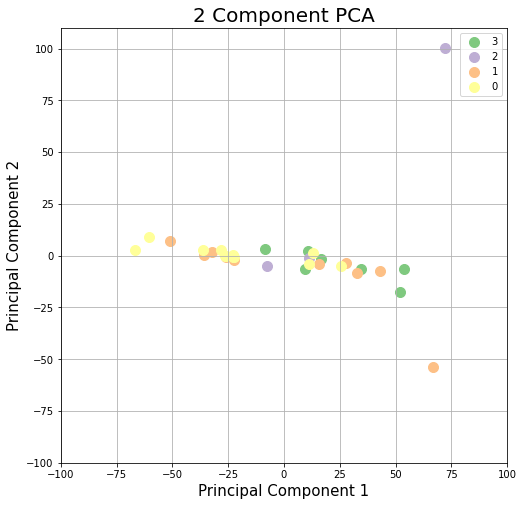

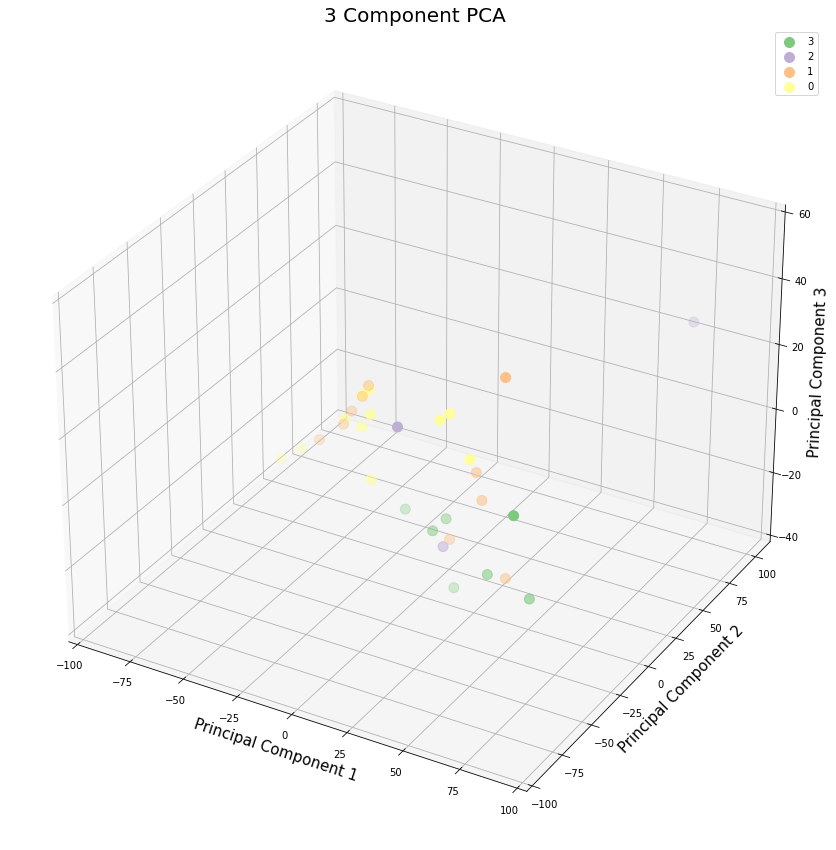

In [78]:
#출처: https://ssungkang.tistory.com/entry/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-PCA-2-python-%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-PCA-%EC%8B%A4%EC%8A%B5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_dropfinal_withoutSMILES_appendclass_dropunmane.csv')

#데이터 분류
dataset = df.values
X = dataset[:,0:3336]
Y = dataset[:,3337]

#특성을 표준화 전처리
sc = StandardScaler()
X_std = sc.fit_transform(X)

#PCA 사용

#2차원

pca2d = PCA(n_components=2)
principalComponents2d = pca.fit_transform(X_std)
principalDf2d = pd.DataFrame(data = principalComponents2d
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf2d)
finalDataFrame2d = pd.concat([principalDf2d, df[['score']]], axis=1)
print(finalDataFrame2d)

#3차원

pca3d = PCA(n_components=3)
principalComponents3d = pca3d.fit_transform(X_std)
principalDf3d = pd.DataFrame(data = principalComponents3d
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#print(principalDf3d)
finalDataFrame3d = pd.concat([principalDf3d, df[['score']]], axis=1)
print(finalDataFrame3d)

#2차원 산점도 그리기

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
plt.axis([-100, 100, -100, 110]) 

scores = [0,1,2,3]
colors = ["#7fc97f","#beaed4","#fdc086","#ffff99"]
for score, color in zip(scores, colors):
    indicesToKeep = finalDataFrame2d['score'] == score
    ax.scatter(finalDataFrame2d.loc[indicesToKeep, 'principal component 1'], 
               finalDataFrame2d.loc[indicesToKeep, 'principal component 2'], c = color, s = 100)

ax.legend(labels)
ax.grid()


#3차원 산점도 그리기

fig2 = plt.figure(figsize=(15,15))
ax2 = fig2.add_subplot(111, projection='3d')

ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_zlabel('Principal Component 3', fontsize = 15)
ax2.set_title('3 Component PCA', fontsize = 20)
plt.axis([-100, 100, -100, 110])
ax2.set_zlim(-40, 60)

scores = [0,1,2,3]
colors = ["#7fc97f","#beaed4","#fdc086","#ffff99"]
for score, color in zip(scores, colors):
    indicesToKeep = finalDataFrame3d['score'] == score
    ax2.scatter(finalDataFrame3d.loc[indicesToKeep, 'principal component 1']
               , finalDataFrame3d.loc[indicesToKeep, 'principal component 2']
               , finalDataFrame3d.loc[indicesToKeep, 'principal component 3'], c = color, s = 100)
    

ax2.legend(labels)
ax2.grid()

plt.savefig('./PCA.png')